In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from stock_price_handler import load_stock_prices, get_log_returns
from plots import histogram
from sde import BlackScholes

In [2]:
TIME_INCREMENT = 5
STOCK_NAME = "nestle.csv"

In [3]:
stock_prices = load_stock_prices(STOCK_NAME)
actual_log_returns = get_log_returns(stock_prices)

In [4]:
sigma = np.std(actual_log_returns) / np.sqrt(TIME_INCREMENT)
mu = np.mean(actual_log_returns) / TIME_INCREMENT + np.square(sigma) / 2


In [5]:
black_scholes = BlackScholes(mu=mu, sigma=sigma, sample_size=len(stock_prices))

initial_states = torch.tensor(np.array(stock_prices))
times = torch.linspace(0, TIME_INCREMENT, 10)

terminal_states = black_scholes.solution(initial_states, times)[-1]

In [6]:
bs_log_returns = np.log(terminal_states.squeeze().numpy() / initial_states.squeeze().numpy())

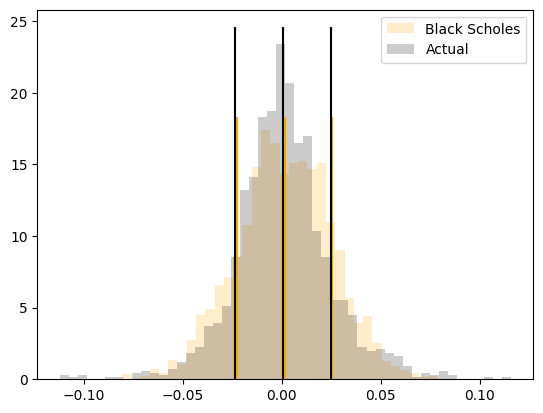

In [7]:
histogram(bs_log_returns, label="Black Scholes", color="orange")
histogram(actual_log_returns, label="Actual", color="black")
plt.legend()
plt.show()